# Fractional Arcs 
 The following program constructs and visualizes the Farey-squence at arbitrary order. <br>

The Farey-sequence of order $n$ is the sequence of all fully reduced fractions $p/q$ in the interval $[0,1]$with $1 \leq q \leq n$ . The Faray sequence $F_{n+1}$  of order $n+1$ can easily be constructed if $F_n$ is known. To this end, we calculate the expression $$\frac{p_1 + p_2}{q_1 + q_2}$$ of two neighbouring entries from $F_n$ and add it to the sequence if $q_1 + q_2 = n + 1$

In [2]:
import sys
import numpy as np 
import matplotlib.pyplot as plt


In [8]:
# To plot a Farey sequence

def farey_plot(num,denom):
  numbers = num/denom
  mid_points = (numbers[1:]+ numbers[:-1])/2
  radius = (numbers[1:]- numbers[:-1])/2

  for i in range(len(mid_points)):
    x = np.linspace(mid_points[i]-radius[i], mid_points[i]+radius[i], 500)
    x = x[1:-1] # exclude negative values 
    y = np.sqrt(radius[i]**2) - (x- mid_points[i])**2

    if i == 0:
      p = plt.plot(x,y)
      color = p[-1].get_color()
    else:
      plt.plot(x,y, color = color)

    ticks = [ str(p) + "/" + str(q) for (p, q) in zip(num, denom) ]
    plt.xticks(numbers, ticks)











Text(0.5, 1.0, '$F_1$ up to $F_10$')

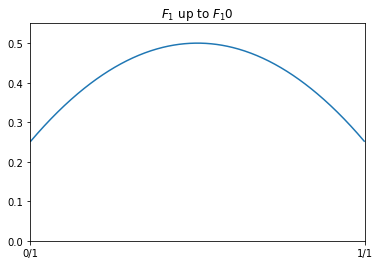

In [10]:
# First element of the Farey Sequence(F_1) is: 
num = np.array([0, 1])
denom = np.array([1, 1])
N = 10

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 0.55)
farey_plot(num, denom)
plt.title(r'$F_1$ up to $F_%d$' % (N))

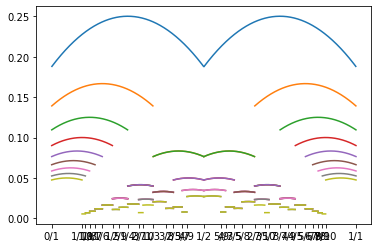

In [12]:
# We will construct F_n out of F_n-1 with the method outlined in
#  https://de.wikipedia.org/wiki/Farey-Folge

for order in range(2, N+1):
  add = denom[1:] + denom[:-1]
  indices = np.where(add == order)[0] + 1

  num = np.insert(num, indices, num[indices-1]+num[indices])
  denom = np.insert(denom, indices, order)
  farey_plot(num, denom)



In [13]:
#print the sequence 

for i in zip(num,denom):
  print(i, end = '')

print()

(0, 1)(1, 10)(1, 9)(1, 8)(1, 7)(1, 6)(1, 5)(2, 9)(1, 4)(2, 7)(3, 10)(1, 3)(3, 8)(2, 5)(3, 7)(4, 9)(1, 2)(5, 9)(4, 7)(3, 5)(5, 8)(2, 3)(7, 10)(5, 7)(3, 4)(7, 9)(4, 5)(5, 6)(6, 7)(7, 8)(8, 9)(9, 10)(1, 1)
